In [151]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import json
plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Experimenting with Gaussian Copulas

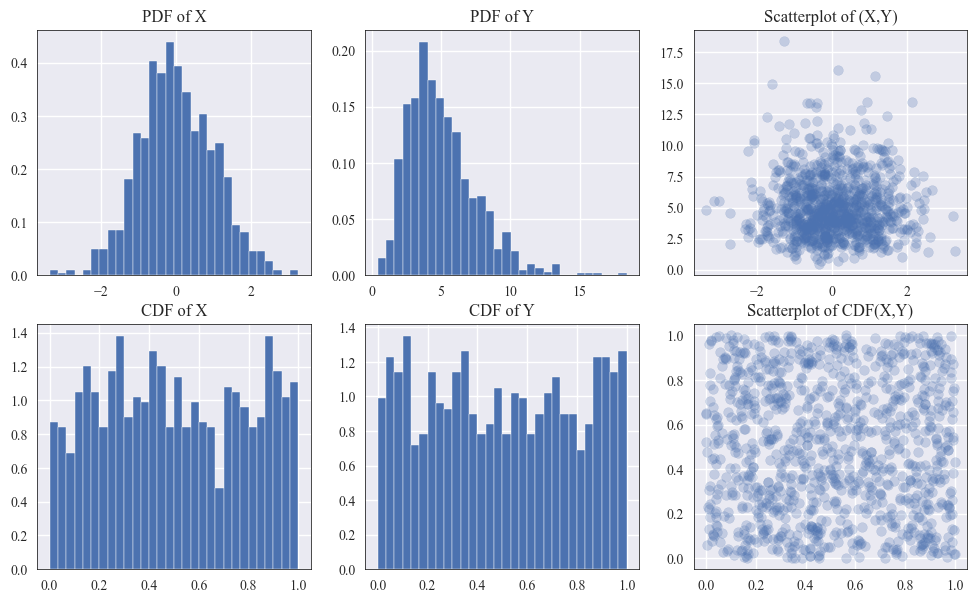

In [152]:
normal = stats.norm()
gamma = stats.gamma(a=5)

X = normal.rvs(1000)
Y = gamma.rvs(1000)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))

ax[0][0].hist(X, density = True, bins = 30)
ax[0][0].set(title = 'PDF of X')

ax[0][1].hist(Y, density = True, bins = 30)
ax[0][1].set(title = 'PDF of Y')

ax[0][2].scatter(X, Y, alpha = 0.25)
ax[0][2].set(title = 'Scatterplot of (X,Y)')

ax[1][0].hist(normal.cdf(X), density = True, bins = 30)
ax[1][0].set(title = 'CDF of X')

ax[1][1].hist(gamma.cdf(Y), density = True, bins = 30)
ax[1][1].set(title = 'CDF of Y')

ax[1][2].scatter(normal.cdf(X), gamma.cdf(Y), alpha = 0.25)
ax[1][2].set(title = 'Scatterplot of CDF(X,Y)');

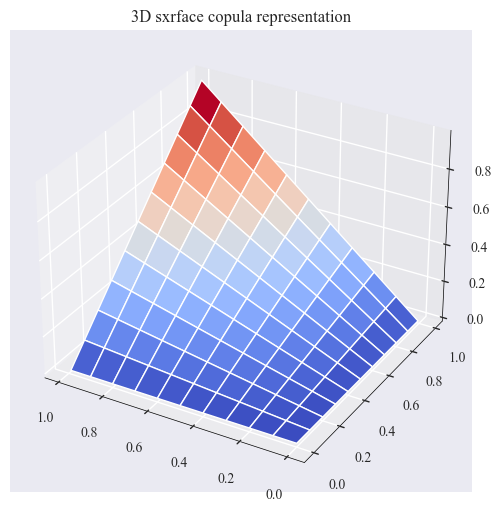

In [156]:
import numpy as np

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection='3d')

x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
x,y = np.meshgrid(x,y)

# apply inverse CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(normal.ppf(x).flatten(),gamma.ppf(y).flatten())])
# calculate the product of two CDFs for each point on a grid
z = normal.cdf(pairs[:,0]).reshape([100,100]) * gamma.cdf(pairs[:,1]).reshape([100,100])

ax0.plot_surface(x, y, z, cmap='coolwarm', rstride=10, cstride=10, linewidth=1)
ax0.invert_xaxis()
ax0.set(title='3D sxrface copula representation');

In [160]:
y

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [0.97, 0.97, 0.97, ..., 0.97, 0.97, 0.97],
       [0.98, 0.98, 0.98, ..., 0.98, 0.98, 0.98],
       [0.99, 0.99, 0.99, ..., 0.99, 0.99, 0.99]])

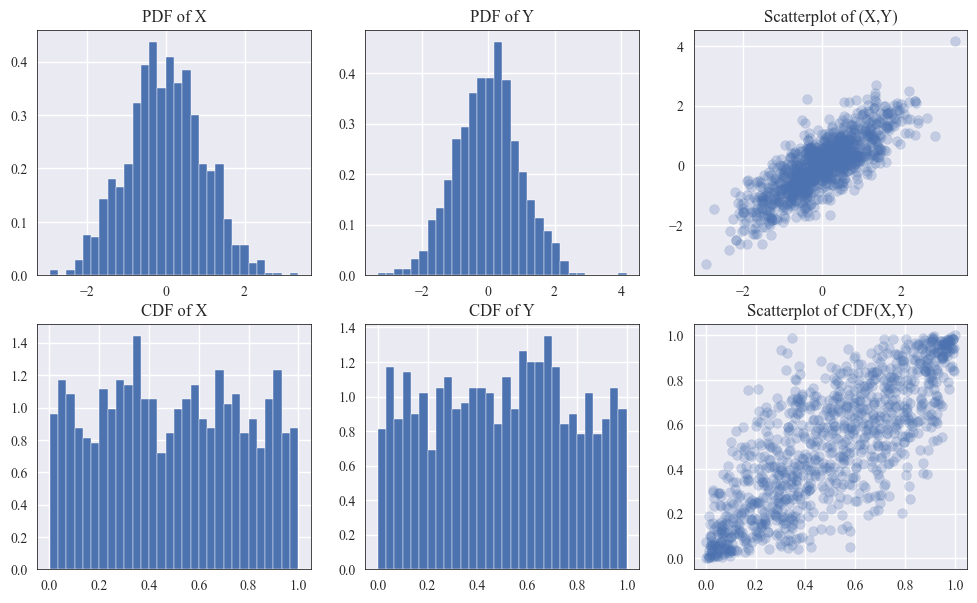

In [154]:
mu = np.array([0, 0])
rho = 0.8
cov = np.array([[1, rho], [rho, 1]])
multivariate_normal = stats.multivariate_normal(mean=mu, cov=cov)

multivariate_sample = multivariate_normal.rvs(size=1000)
X = multivariate_sample[:, 0]
Y = multivariate_sample[:, 1]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))

ax[0][0].hist(X, density = True, bins = 30)
ax[0][0].set(title = 'PDF of X')

ax[0][1].hist(Y, density = True, bins = 30)
ax[0][1].set(title = 'PDF of Y')

ax[0][2].scatter(X, Y, alpha = 0.25)
ax[0][2].set(title = 'Scatterplot of (X,Y)')

ax[1][0].hist(normal.cdf(X), density = True, bins = 30)
ax[1][0].set(title = 'CDF of X')

ax[1][1].hist(normal.cdf(Y), density = True, bins = 30)
ax[1][1].set(title = 'CDF of Y')

ax[1][2].scatter(normal.cdf(X), normal.cdf(Y), alpha = 0.25)
ax[1][2].set(title = 'Scatterplot of CDF(X,Y)');

In [162]:
copula.vector.quantile(x[0])

,ADANIENT.NS,CIPLA.NS
0.00,0.000289,0.000289
0.01,0.010655,0.010286
0.02,0.020491,0.020364
0.03,0.030280,0.030280
0.04,0.040277,0.040404
...,...,...
0.95,0.950014,0.950014
0.96,0.960012,0.960012
0.97,0.970009,0.970274
0.98,0.980087,0.980214


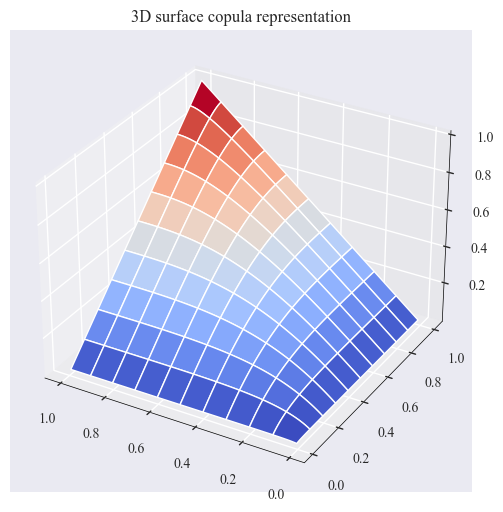

In [164]:
# create a grid
x = np.arange(0.01,1.01,0.01)
y = np.arange(0.01,1.01,0.01)
x,y = np.meshgrid(x,y)

# apply inverse standard normal CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(stats.norm.ppf(x).flatten(),stats.norm.ppf(y).flatten())])
# calculate the value of bivariate normal CDF for each point on a grid
z = multivariate_normal.cdf(pairs).reshape([100,100])

fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(111, projection='3d')

ax0.plot_surface(x, y, z, cmap='coolwarm', rstride=10, cstride=10, linewidth=1)
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation');